# Analysis Report

# Global dataset report

This report is the output of the Amazon SageMaker Clarify analysis. The report is split into following parts:

<pre style='font-family:"Helvetica Neue",Helvetica,Geneva,sans-serif;margin:0'>    1. Analysis configuration
    2. High level model performance
    3. Posttraining bias metrics
</pre>

## Analysis Configuration

Bias analysis requires you to configure the outcome label column, the facet and optionally a group variable. Generating explanations requires you to configure the outcome label. You configured the analysis with the following variables. The complete analysis configuration is appended at the end.

**Outcome label:** You chose the column `star_rating` in the input data as the outcome label. Bias metric computation requires designating the positive outcome. You chose `star_rating = 5,4` as the positive outcome. `star_rating` consisted of values `[1, 2, 3, 4, 5]`. 

The figure below shows the distribution of values of `star_rating`.
<br>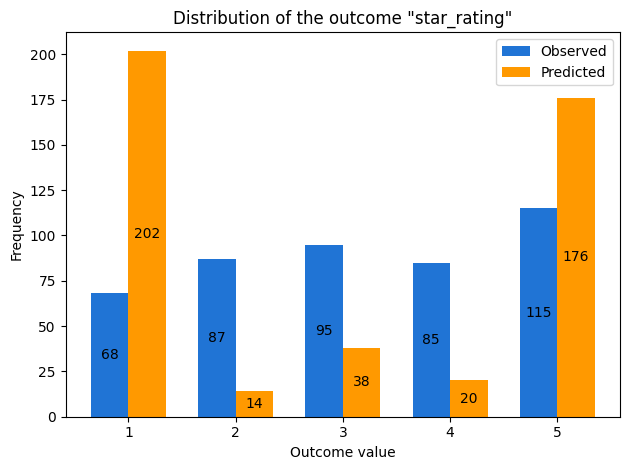<br>

**Facet:** You chose the column `product_category` in the input data as the facet. `product_category` consisted of values `['Digital_Software', 'Digital_Video_Games', 'Gift Card']`. Bias metrics were computed by comparing the inputs `product_category = Gift Card` with all other inputs. 

The figure below shows the distribution of values of `product_category`.
<br>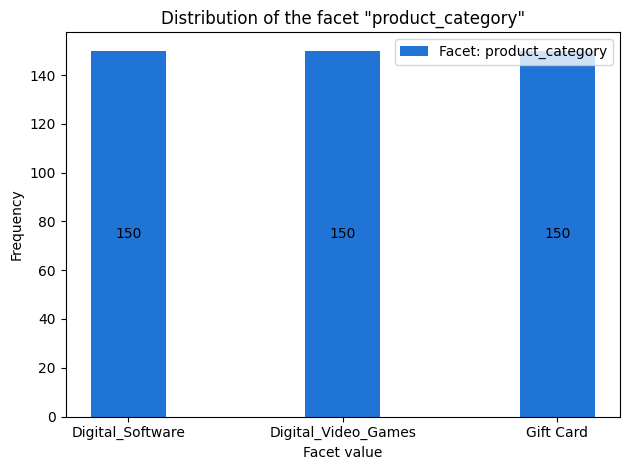<br>

## High level model performance

Input data points can be divided into different categories based on their observed and predicted label. For instance, a <span style="color:#DF2A5D">False Negative (FN)</span> is an input with a positive observed label (`star_rating = 5,4`) but negative predicted label (`star_rating != 5,4`). A <span style="color:#38EF7D">True Negative (TN)</span> is an input whose observed and predicted labels are both negative. <span style="color:#DF2A5D">True Positives (TP)</span> and <span style="color:#38EF7D">False Positives (FP)</span> are defined similarly.

Since the label `star_rating` had more than 2 categories, the first confusion matrix is computed on all labels, and the second is computed on the binarized labels based on the label value/threshold set
<br>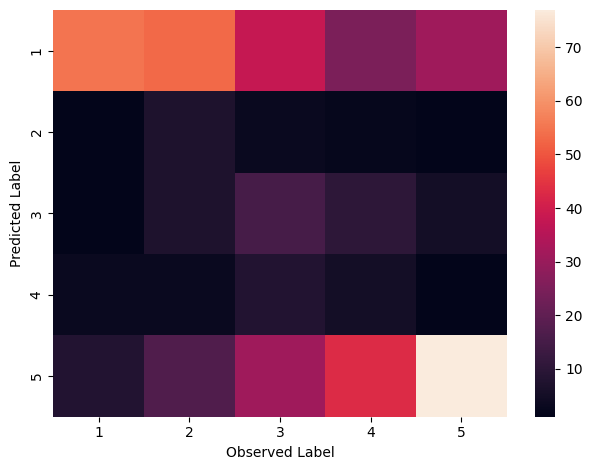<br>
Based on the model predictions, the inputs can be divided into different categories as:
<br>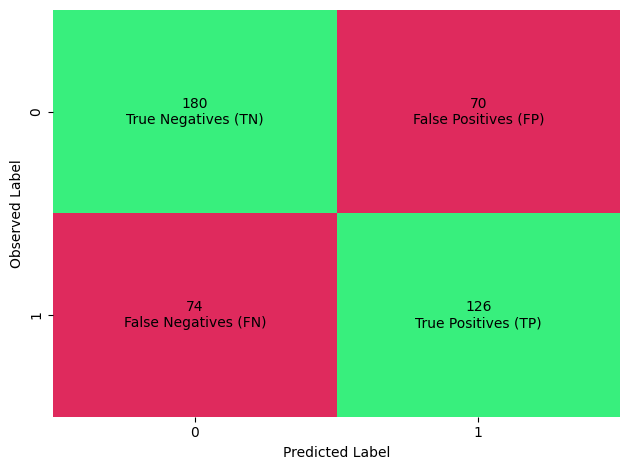<br>
Here are metrics showing the model performance. 
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>Metric</th>
      <th>Description</th>
      <th>Value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <td>Proportion of inputs assigned the correct predicted label by the model.</td>
      <td>0.680</td>
    </tr>
    <tr>
      <td>Proportion of Positive Predictions in Labels</td>
      <td>Proportion of input assigned in positive predicted label.</td>
      <td>0.436</td>
    </tr>
    <tr>
      <td>Proportion of Negative Predictions in Labels</td>
      <td>Proportion of input assigned the negative predicted label.</td>
      <td>0.564</td>
    </tr>
    <tr>
      <td>True Positive Rate / Recall</td>
      <td>Proportion of inputs with positive observed label correctly assigned the positive predicted label.</td>
      <td>0.630</td>
    </tr>
    <tr>
      <td>True Negative Rate / Specificity</td>
      <td>Proportion of inputs with negative observed label correctly assigned the negative predicted label.</td>
      <td>0.720</td>
    </tr>
    <tr>
      <td>Acceptance Rate / Precision</td>
      <td>Proportion of inputs with positive predicted label that actually have a positive observed label.</td>
      <td>0.643</td>
    </tr>
    <tr>
      <td>Rejection Rate</td>
      <td>Proportion of inputs with negative predicted label that actually have a negative observed label.</td>
      <td>0.709</td>
    </tr>
    <tr>
      <td>Conditional Acceptance</td>
      <td>Ratio between the positive observed labels and positive predicted labels.</td>
      <td>1.020</td>
    </tr>
    <tr>
      <td>Conditional Rejection</td>
      <td>Ratio between the negative observed labels and negative predicted labels.</td>
      <td>0.984</td>
    </tr>
    <tr>
      <td>F1 Score</td>
      <td>Harmonic mean of precision and recall.</td>
      <td>0.636</td>
    </tr>
  </tbody>
</table>
</div>
<div style='clear:left'> </div>

## Post-training Bias Metrics

Posttraining bias metrics measure imbalances in model predictions across different inputs. The figure below shows how different posttraining metrics target different types of imbalances over inputs. For a detailed description of these types, see [Learn How Amazon SageMaker Clarify Helps Detect Bias](https://aws.amazon.com/blogs/machine-learning/learn-how-amazon-sagemaker-clarify-helps-detect-bias/). 
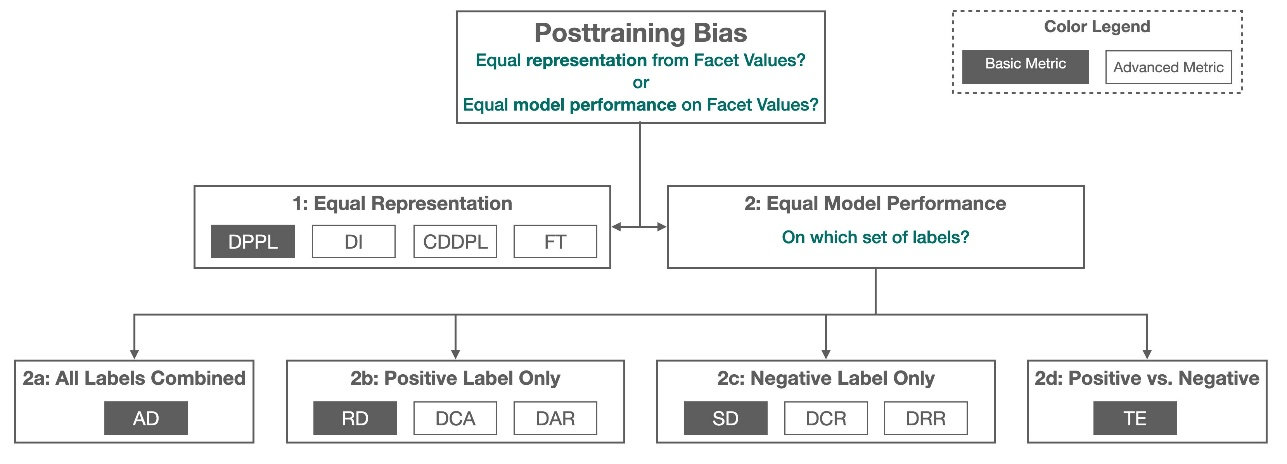
Bias can also result form imbalances in the model outcomes even when the facet value is not considered. The metric computing these imbalances is GE.
The metric values along with an informal description of what they mean are shown below. For mathematical formulas and examples, see the [Measure Posttraining Data and Model Bias](https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-measure-post-training-bias.html) section of the AWS documentation.

We computed the bias metrics for the label `star_rating` using label value(s)/threshold             `star_rating = 5,4` for the following facets: 

* Facet column: **product_category** <br> 
<div style='clear:left'> Facet Value(s)/Threshold: <code>product_category = Gift Card</code> </div>
<br>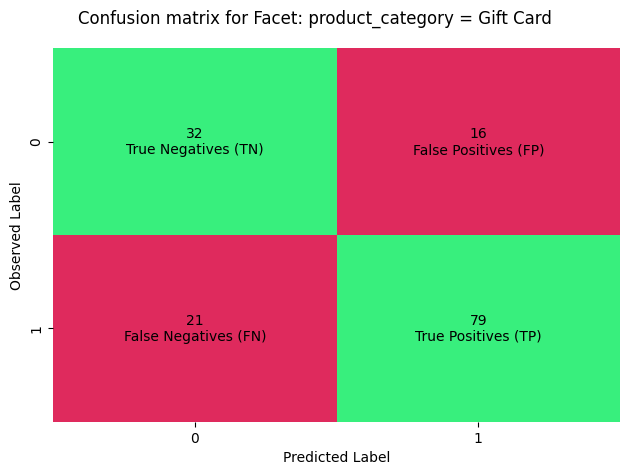<br>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table style="float:left" border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>Metric</th>
      <th>Description</th>
      <th>Value</th>
      <th>Error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-ad.html">Accuracy Difference (AD)</a></td>
      <td>Measures the difference between the prediction accuracy for facet values <code>product_category = Gift Card</code> and rest of the inputs.</td>
      <td>-0.100</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-dppl.html">Conditional Demographic Disparity in Predicted Labels (CDDPL)</a></td>
      <td>Measures the disparity of predicted labels between facet values <code>product_category = Gift Card</code> and rest of the inputs as a whole, but also by subgroups dictated by Age.</td>
      <td>None</td>
      <td>Error: see Clarify job output</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-dcr.html">Difference in Acceptance Rates (DAR)</a></td>
      <td>Measures the difference in the ratios of the observed positive outcomes (TP) to the predicted positives (TP + FP) between facet values <code>product_category = Gift Card</code> and rest of the inputs.</td>
      <td>-0.360</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-dca.html">Difference in Conditional Acceptance (DCAcc)</a></td>
      <td>Compares the observed labels to the labels predicted by the model. Assesses whether this is the same across facet values <code>product_category = Gift Card</code> and rest of the inputs for predicted positive outcomes (acceptances).</td>
      <td>-0.041</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-dcr.html">Difference in Conditional Rejection (DCR)</a></td>
      <td>Compares the observed labels to the labels predicted by the model and assesses whether this is the same across facet values <code>product_category = Gift Card</code> and rest of the inputs for negative outcomes (rejections).</td>
      <td>-0.075</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-di.html">Disparate Impact (DI)</a></td>
      <td>Measures the ratio of proportions of the predicted labels for facet values <code>product_category = Gift Card</code> and rest of the inputs.</td>
      <td>1.960</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-dppl.html">Difference in Positive Proportions in Predicted Labels (DPPL)</a></td>
      <td>Measures the difference in the proportion of positive predictions between facet values <code>product_category = Gift Card</code> and rest of the inputs.</td>
      <td>-0.317</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-drr.html">Difference in Rejection Rates (DRR)</a></td>
      <td>Measures the difference in the ratios of the observed negative outcomes (TN) to the predicted negatives (TN + FN) between facet values <code>product_category = Gift Card</code> and rest of the inputs.</td>
      <td>-0.133</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-rd.html">Recall Difference (RD)</a></td>
      <td>Measures the difference between the recall, aka true positive rate, of the model for facet values <code>product_category = Gift Card</code> and rest of the inputs.</td>
      <td>-0.327</td>
      <td>None</td>
    </tr>
    <tr>
      <td><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-post-training-bias-metric-te.html">Treatment Equality (TE)</a></td>
      <td>Measures the difference in the ratio of false positives to false negatives between facet values <code>product_category = Gift Card</code> and rest of the inputs.</td>
      <td>0.235</td>
      <td>None</td>
    </tr>
  </tbody>
</table>
</div>
<div style='clear:left'> </div>

## Appendix: Analysis Configuration Parameters

```
{
    "dataset_type": "application/jsonlines",
    "features": "features",
    "headers": [
        "review_body",
        "product_category",
        "star_rating"
    ],
    "label": "star_rating",
    "label_values_or_threshold": [
        5,
        4
    ],
    "facet": [
        {
            "name_or_index": "product_category",
            "value_or_threshold": [
                "Gift Card"
            ]
        }
    ],
    "methods": {
        "post_training_bias": {
            "methods": [
                "DPPL",
                "DI",
                "DCA",
                "DCR",
                "RD",
                "DAR",
                "DRR",
                "AD",
                "CDDPL",
                "TE"
            ]
        },
        "report": {
            "name": "report",
            "title": "Analysis Report"
        }
    },
    "predictor": {
        "label": "predicted_label",
        "model_name": "pipelines-s7paou48eed0-createmodel-dtxkpwxj4c",
        "instance_type": "ml.m5.4xlarge",
        "initial_instance_count": 1,
        "accept_type": "application/jsonlines",
        "content_type": "application/jsonlines",
        "content_template": "{\"features\":$features}"
    }
}
```